## Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np

In [3]:
#Goal of this project is to predict the car price using features of the car
car_prices_data = pd.read_csv("./data/data.csv")
car_prices_data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Clean up and view the distribution of data

In [4]:
#Make column names consistent
car_prices_data.columns = car_prices_data.columns.str.lower().str.replace(" ", "_")
car_prices_data.head()
car_prices_data.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [5]:
#Print unique values in each string columns
cols = car_prices_data.select_dtypes(include=["object"])
for c in cols:
    unique_values = car_prices_data[c].unique()
    print(c)
    print(unique_values)
    print(car_prices_data[c].nunique())
    print()
    
print("Max year & Min make year")
print(car_prices_data["year"].max())
print(car_prices_data["year"].min())


make
['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Tesla' 'Bugatti']
48

model
['1 Series M' '1 Series' '100' '124 Spider' '190-Class' '2 Series' '200'
 '200SX' '240SX' '240' '2' '3 Series Gran Turismo' '3 Series' '300-Class'
 '3000GT' '300' '300M' '300ZX' '323' '350-Class' '350Z' '360' '370Z' '3'
 '4 Series Gran Coupe' '4 Series' '400-Class' '420-Class' '456M'
 '458 Italia' '4C' '4Runner' '5 Series Gran Turismo' '5 Series'
 '500-Class' '500e' '500' '500L' '500X' '550' '560-Class' '570S' '575M'
 '57' '599' '5' '6 Series Gran Coupe' '6 Series' '600-Class' '6000'
 '612 Scaglietti'

### Distribution of prices

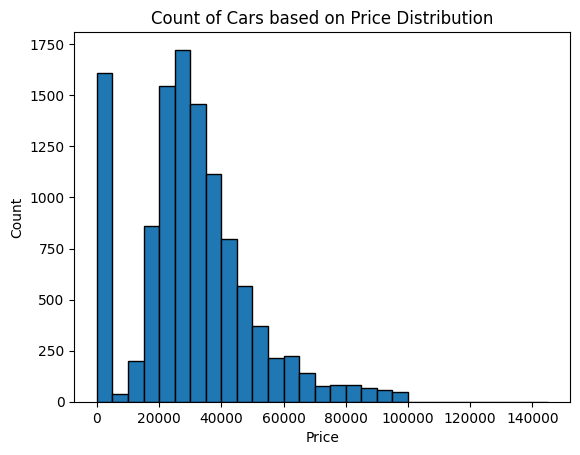

In [6]:
import matplotlib.pyplot as plt
bin_edges = []  
for bin in range(0,150000,5000):
    bin_edges.append(bin)
plt.hist(car_prices_data[car_prices_data['msrp']<100000]['msrp'], bins=bin_edges, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Count of Cars based on Price Distribution')
plt.show()

(array([1138.,   93.,   66.,   66.,   57.,   51.,   50.,   36.,   18.,
          15.,   16.,    6.,    3.,   11.,    4.,    4.,    3.,    3.,
           3.,    2.,    6.,   11.,   12.,   24.,   53.,  121.,  201.,
         208.,  274.,  384.,  535.,  589.,  711.,  731.,  734.,  767.,
         736.,  622.,  575.,  503.,  398.,  343.,  233.,  190.,  197.,
         104.,   95.,  108.,   90.,   76.]),
 array([ 7.60140233,  7.67962299,  7.75784365,  7.83606432,  7.91428498,
         7.99250564,  8.0707263 ,  8.14894696,  8.22716762,  8.30538828,
         8.38360894,  8.4618296 ,  8.54005026,  8.61827092,  8.69649158,
         8.77471224,  8.8529329 ,  8.93115356,  9.00937422,  9.08759488,
         9.16581554,  9.2440362 ,  9.32225686,  9.40047752,  9.47869818,
         9.55691884,  9.6351395 ,  9.71336016,  9.79158082,  9.86980148,
         9.94802214, 10.0262428 , 10.10446346, 10.18268412, 10.26090478,
        10.33912544, 10.4173461 , 10.49556676, 10.57378742, 10.65200808,
        10.73022

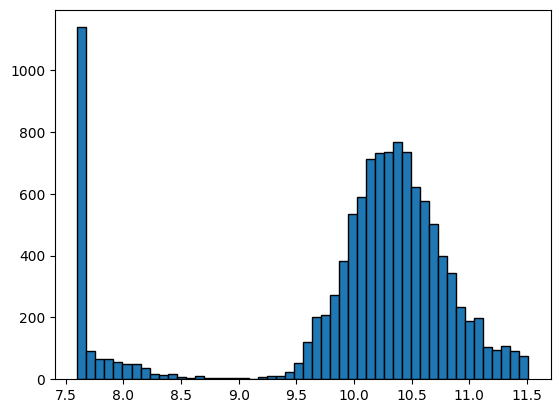

In [18]:
prices = car_prices_data[car_prices_data['msrp']<100000]['msrp']
lg_prices = np.log1p(prices)
plt.hist(lg_prices, bins=50, edgecolor='black')

### Missing Values

In [21]:
car_prices_data.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Setting up Validation Framework

Split the dataset in to 3 sets --> 1) Train (60%) 2) Validation (20%) 3) Test (20%)

In [26]:
n_test = len(car_prices_data) * 0.2
n_validation = len(car_prices_data) * 0.2
n_train = len(car_prices_data) - n_test - n_validation
assert((n_test + n_train + n_validation) == len(car_prices_data))

In [50]:
#shuffle the index so that your data for test/validation/train is not following order
index = np.arange(len(car_prices_data))
np.random.shuffle(index)

train_data = car_prices_data.iloc[index[:int(n_train)]]
val_data = car_prices_data.iloc[index[int(n_train):int(n_validation+n_train)]]
test_data = car_prices_data.iloc[index[int(n_validation+n_train):]]

In [53]:
test_data

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
6362,Plymouth,Laser,1994,regular unleaded,195.0,4.0,MANUAL,front wheel drive,2.0,"Hatchback,Performance",Compact,2dr Hatchback,26,19,535,2000
7516,Nissan,Pathfinder,2015,regular unleaded,260.0,6.0,AUTOMATIC,four wheel drive,4.0,Crossover,Large,4dr SUV,26,19,2009,37900
6424,Acura,Legend,1995,regular unleaded,200.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,22,17,204,2356
1094,Audi,A5,2016,premium unleaded (required),220.0,4.0,MANUAL,all wheel drive,2.0,Luxury,Midsize,Coupe,32,22,3105,42800
8973,Hyundai,Santa Fe Sport,2015,regular unleaded,264.0,4.0,AUTOMATIC,all wheel drive,4.0,Crossover,Midsize,4dr SUV,24,18,1439,33000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,Ford,Contour SVT,1998,regular unleaded,195.0,6.0,MANUAL,front wheel drive,4.0,"Factory Tuner,Performance",Midsize,Sedan,26,17,5657,2655
995,Volvo,940,1995,regular unleaded,162.0,4.0,AUTOMATIC,rear wheel drive,4.0,Luxury,Midsize,Wagon,24,17,870,2000
9196,Suzuki,Sidekick,1998,regular unleaded,120.0,4.0,MANUAL,four wheel drive,4.0,NaN,Compact,4dr SUV,23,20,481,2078
3934,Buick,Enclave,2017,regular unleaded,288.0,6.0,AUTOMATIC,all wheel drive,4.0,Crossover,Midsize,4dr SUV,22,15,155,49625
